In [1]:
import spotipy
import spotipy.util as util


client_id = 'b69a9985fa8842deb0691b2d0e3f0b69'
client_secret = 'd9e9ae2924174c139a5a9ccb303f9f3a'
redirect_uri = 'http://localhost/'

username = '22mrmbu7oumkrb56tcsclawdi'
scope = 'user-library-read'

token = util.prompt_for_user_token(username, scope, client_id=client_id, client_secret=client_secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    tracks = []
    offset = 0
    while True:
        track_set = sp.current_user_saved_tracks(limit=50, offset=offset)['items']
        if track_set:
            tracks += track_set
        else:
            break
        offset += 50
    ids = []
    for track in tracks:
        ids.append(track['track']['id'])


In [2]:
data = {
    'acousticness': [],
    'danceability': [],
#     'duration_ms': [],
    'energy': [],
    'instrumentalness': [],
#     'key': [],
#     'liveness': [],
    'loudness': [],
#     'mode': [],
    'speechiness': [],
    'tempo': [],
#     'time_signature': [],
    'valence': [],
}


id_chunks = [ids[i:i + 100] for i in range(0, len(ids), 100)]
for chunk in id_chunks:
    tracks = sp.audio_features(tracks=chunk)
    for track in tracks:
        for key in data:
            data[key].append(track[key])


,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,valence
7MCgEv2ovQuxfijz2WZ4kH,0.033000,0.6150,0.826,0.000070,-3.774,0.1450,121.940,0.4890
6OASuyRPP9Z7Ng6v3fCby7,0.008490,0.4640,0.966,0.045500,-2.118,0.2470,149.719,0.4380
2rfHCPzXCEYL5B7Z2j4yiE,0.023400,0.6360,0.933,0.013100,-3.349,0.5150,170.276,0.3920
5EX8gks8V2wDZanRGAy8pm,0.004670,0.6650,0.951,0.000072,-2.204,0.3390,75.006,0.4820
5eJQn2KuywbQxYBwZA4qRq,0.000717,0.7060,0.913,0.004580,-3.236,0.2130,127.927,0.4780
1AjfhyWbDYvrja6Z2SScxg,0.006990,0.5920,0.964,0.382000,-3.254,0.3570,74.896,0.4790
1AIHqJAaV8If2DQ29BotoL,0.034600,0.4970,0.913,0.014000,-3.385,0.2890,115.559,0.1820
76ovB1o23o87WCV2wQqOfq,0.023000,0.5010,0.898,0.008410,-4.911,0.3160,106.393,0.2290
08aV7tJySewyN66bLeaJZl,0.028600,0.5110,0.733,0.004910,-2.802,0.0455,80.000,0.1360
4FtjMbx5rC3fUqcBJXhu1G,0.000429,0.6600,0.798,0.812000,-5.549,0.0394,123.013,0.4200


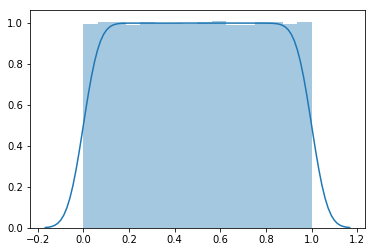

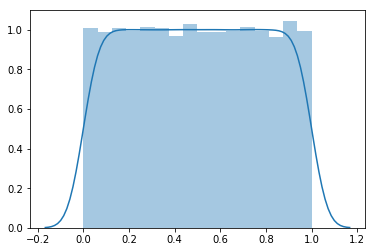

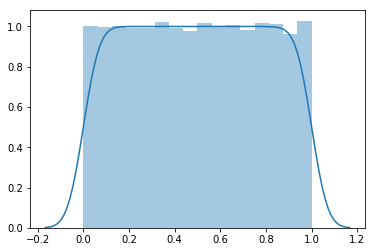

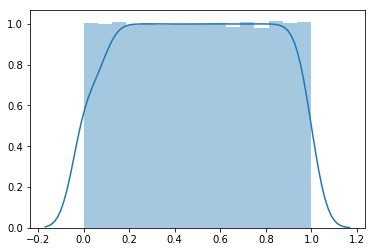

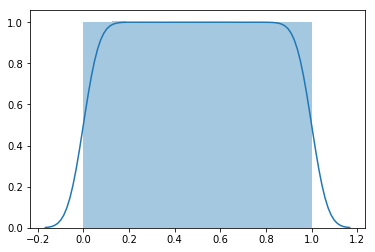

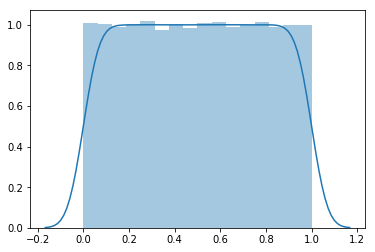

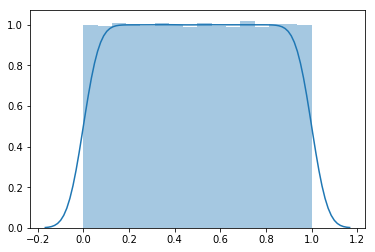

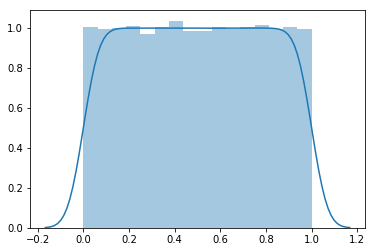

In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(data=data, index=ids)
display(df)
X = preprocessing.quantile_transform(df.values)
for x in X.transpose():
    sns.distplot(x)
    plt.show()
clusters = 5
kmeans = KMeans(n_clusters=clusters, n_jobs=-1).fit(X)



In [13]:
kmeans.cluster_centers_

array([[0.08939141, 0.69875449, 0.8077369 , 0.06501673, 0.84186345,
        0.16221966, 0.51341229, 0.55533847],
       [0.0410354 , 0.71808685, 0.83233902, 0.76253056, 0.8107346 ,
        0.09516752, 0.52381666, 0.51484078],
       [0.10623589, 0.56778179, 0.73383566, 0.07054129, 0.82049018,
        0.11223946, 0.51521949, 0.21135281],
       [0.69677438, 0.466517  , 0.39417586, 0.72971001, 0.62614462,
        0.07974632, 0.46375545, 0.15756792],
       [0.04552104, 0.66692412, 0.73239345, 0.81856808, 0.75553024,
        0.07715651, 0.51300963, 0.14202955]])

In [15]:
classified = [[] for i in range(clusters)]
ids = df.index.values
for i in range(len(df)):
    cluster = kmeans.predict(X[0].reshape(1, -1))[0]
    classified[cluster].append(ids[i])
for i in classified:
    print(len(i))

0
3781
0
0
0


In [11]:
import json
print(json.dumps(ids, sort_keys=True, indent=4))

[
    "7MCgEv2ovQuxfijz2WZ4kH",
    "6OASuyRPP9Z7Ng6v3fCby7",
    "2rfHCPzXCEYL5B7Z2j4yiE",
    "5EX8gks8V2wDZanRGAy8pm",
    "5eJQn2KuywbQxYBwZA4qRq",
    "1AjfhyWbDYvrja6Z2SScxg",
    "1AIHqJAaV8If2DQ29BotoL",
    "76ovB1o23o87WCV2wQqOfq",
    "08aV7tJySewyN66bLeaJZl",
    "4FtjMbx5rC3fUqcBJXhu1G",
    "6e73qpQWQ29M0LvGQE7ty6",
    "6uPIFAFYEDe0slXVK8ItNw",
    "0UuJ6TJjNkHbsyABoPeChK",
    "0qHP673XWAzjaRWaCnt6UR",
    "1v6wfh5bUCnOttxRUpNST2",
    "5DVVw9e4D656vURT3pfnjg",
    "2QI27m4N0LeLjM6gnjqqba",
    "04QZdz4g1qoDlPscXVXS1I",
    "6HUnAzGo1zYfdX4ZW1yiZh",
    "71upFBsPnG7fcqDZumcvdY",
    "4S3gJRP2NP2mNTiDfrdg6c",
    "5RSLE68Xq2m6h7ggtVReSL",
    "6K01vp2R6Xx9Bgmu5Vc08N",
    "4KqjjTByIjy857uz5TMOuL",
    "0parKbfhq70aUrE3aizKVL",
    "2Gfo3mfXgdhpSvH9duktLF",
    "52D8soqBmhhjL3xZiIg5id",
    "0MMt3ip0bxAYZ0AwRneZZs",
    "5sXZu5bcIOqwisc6hE7GNL",
    "2b7pyFqFVASnR9bEiy3nbP",
    "0SwFyr4wuRAWBXdm4DPd1u",
    "03G1KdInnkmzRWn0mD7oS2",
    "2zIKT2I1iagk8UuaOO22Ho",
    "0hO